<a href="https://colab.research.google.com/github/IlnazY/example/blob/master/testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
from scipy import stats
from scipy.stats import norm
import warnings


warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('vehicles.csv')
data.tail()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
45520,13.523182,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
45521,12.935217,0.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
45522,14.167143,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
45523,14.167143,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
45524,16.528333,0.0,0.0,0.0,16,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [ ]:
data.describe()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
count,45525.000000,45525.000000,45525.0,45525.000000,45525.000000,45525.000000,45525.000000,45525.000000,45525.000000,45525.000000,...,45525.000000,45525.000000,45525.000000,45525.000000,45525.000000,45525.000000,45525.000000,45525.000000,45525.000000,45525.000000
mean,15.367278,0.189634,0.0,0.093243,18.953125,7.758234,0.829061,0.698859,0.000501,0.608982,...,24.043631,1.100113,35.155499,0.884697,2003.450412,-5330.422845,0.016112,0.264294,0.267150,0.264382
std,4.289698,0.976668,0.0,0.897977,9.683471,13.649170,6.376695,6.285864,0.037375,5.310647,...,13.787816,9.009790,12.876006,5.667478,12.112226,4474.185847,0.327983,3.726115,3.608891,3.649460
min,0.047081,0.000000,0.0,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1984.000000,-39000.000000,0.000000,0.000000,0.000000,0.000000
25%,12.935217,0.000000,0.0,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.506500,0.000000,28.000000,0.000000,1992.000000,-8000.000000,0.000000,0.000000,0.000000,0.000000
50%,14.875500,0.000000,0.0,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21.899500,0.000000,33.597000,0.000000,2004.000000,-5250.000000,0.000000,0.000000,0.000000,0.000000
75%,17.500588,0.000000,0.0,0.000000,21.000000,16.779000,0.000000,0.000000,0.000000,0.000000,...,26.300000,0.000000,39.700000,0.000000,2014.000000,-2500.000000,0.000000,0.000000,0.000000,0.000000
max,42.501429,16.528333,0.0,15.300000,150.000000,150.195800,145.000000,145.083500,5.350000,122.000000,...,224.800000,207.262200,187.100000,173.143600,2023.000000,8000.000000,9.600000,97.000000,81.000000,88.000000


Missing Values

In [ ]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [ ]:
missing_values_table(data)

Your selected dataframe has 71 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
feScore,32012,70.3
eng_dscr,16885,37.1
drive,1186,2.6
cylinders,399,0.9
displ,397,0.9
mpgData,54,0.1
trany,11,0.0


In [ ]:
# # Get the columns with > 50% missing
missing_df = missing_values_table(data);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 83 columns.
There are 18 columns that have missing values.
We will remove 12 columns.


In [ ]:
# # Drop the columns
data = data.drop(columns = list(missing_columns))

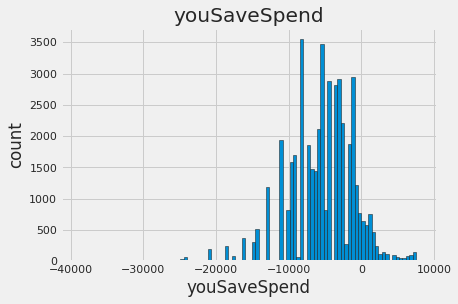

In [ ]:
plt.style.use('fivethirtyeight')
plt.hist(data['youSaveSpend'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('youSaveSpend'); plt.ylabel('count'); 
plt.title('youSaveSpend');

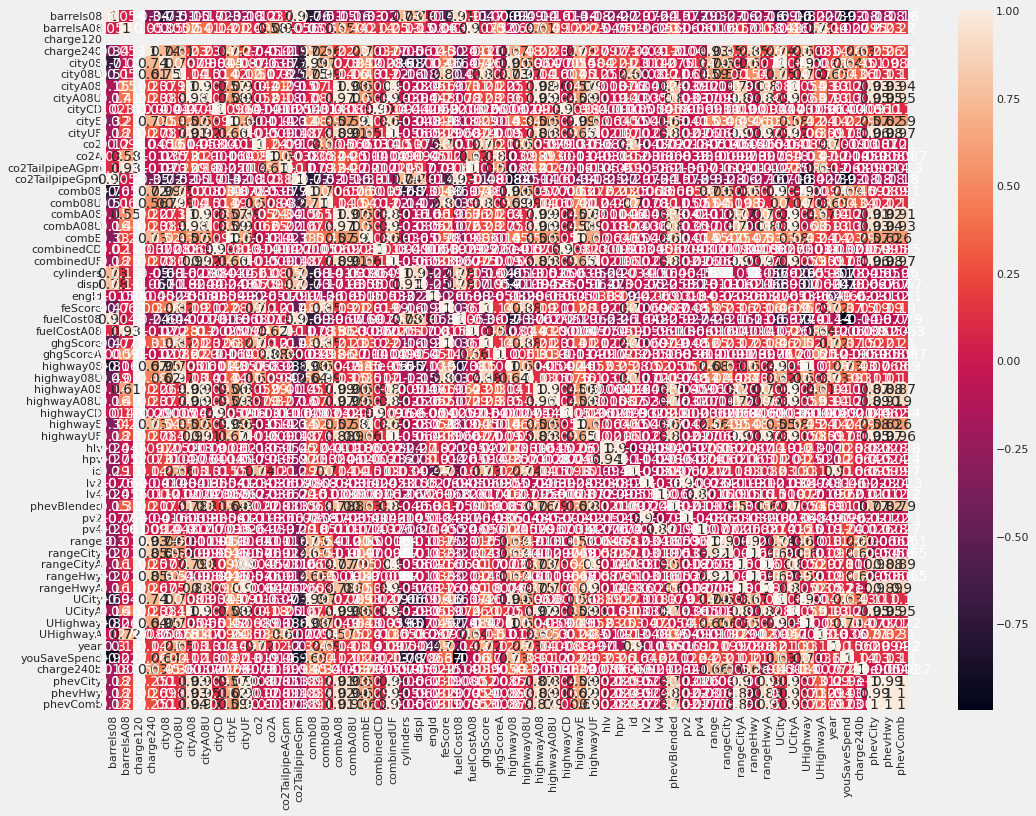

In [ ]:
#correlation matrix
corrmat =  data.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corrmat, annot=True, fmt='.2g')

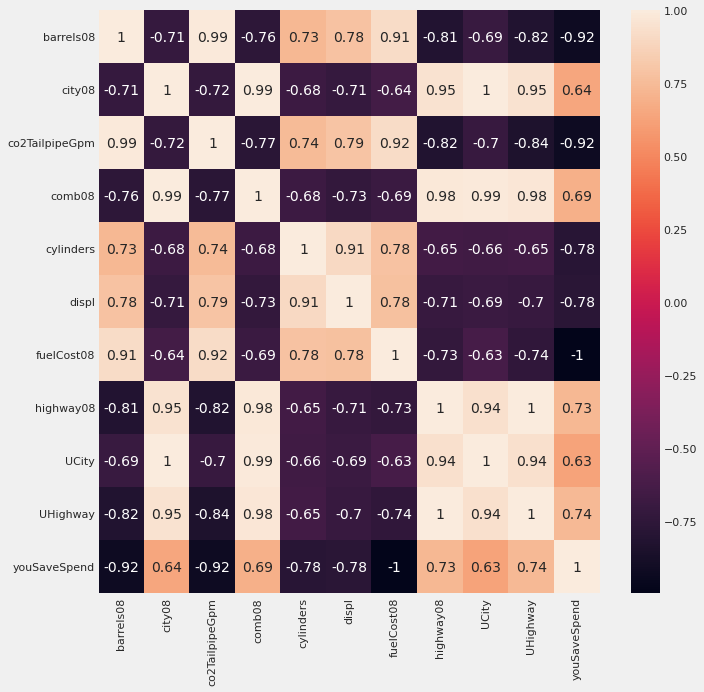

In [ ]:
# most correlated features

top_corr_features = corrmat.index[abs(corrmat['youSaveSpend'])>0.5]

plt.figure(figsize=(10,10))

sns.heatmap(data[top_corr_features].corr(), annot=True)


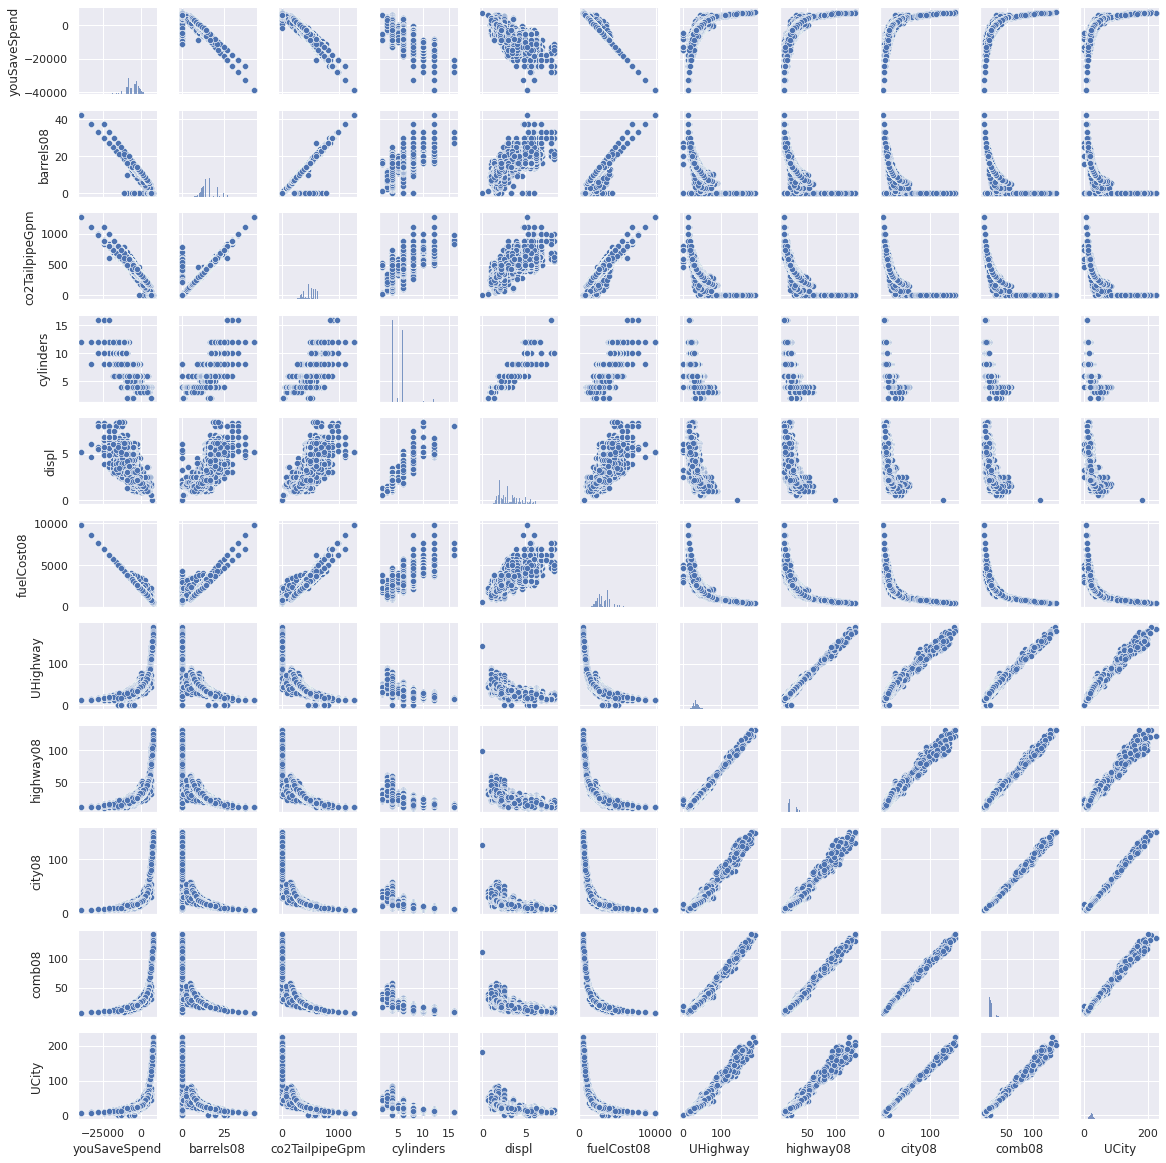

In [ ]:
#scatterplot
sns.set()
cols = ['youSaveSpend', 'barrels08', 'co2TailpipeGpm', 'cylinders', 'displ', 'fuelCost08', 'UHighway', 'highway08', 'city08', 'comb08', 'UCity']
sns.pairplot(data[cols], height = 1.5)
plt.show();

видим, что:

чем выше barreks08, тем больше расходы
чем выше co2GPM тем больше расходы
чем меньше цилиндров, тем меньше расходы
чем меньше disp, тем меньше расходы
чем меньше fuelcost08, тем ниже расходы
чем больше uhighway тем ниже расходы
чем больше highway08, тем ниже расходы 

# *проверим корреляцию некоторых признаков*

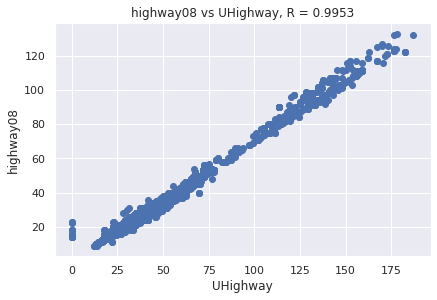

In [ ]:
plot_data = data[['highway08', 'UHighway']].dropna()

plt.plot(plot_data['UHighway'], plot_data['highway08'], 'bo')
plt.xlabel('UHighway'); plt.ylabel('highway08')
plt.title('highway08 vs UHighway, R = %0.4f' % np.corrcoef(data[['highway08', 'UHighway']].dropna(), rowvar=False)[0][1]);
                                                                     

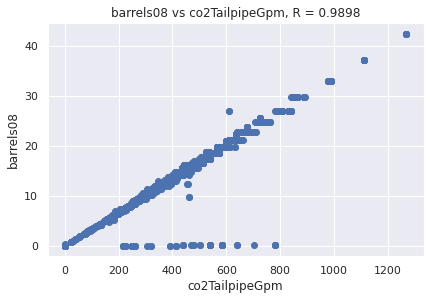

In [ ]:
plot_data = data[['barrels08', 'co2TailpipeGpm']].dropna()

plt.plot(plot_data['co2TailpipeGpm'], plot_data['barrels08'], 'bo')
plt.xlabel('co2TailpipeGpm'); plt.ylabel('barrels08')
plt.title('barrels08 vs co2TailpipeGpm, R = %0.4f' % np.corrcoef(data[['barrels08', 'co2TailpipeGpm']].dropna(), rowvar=False)[0][1]);

# **Эти два признака слишком сильно коррелируют между собой. Оставим только один**

Если посмотреть описание датасета, то есть есть такие данные как скорр, коробка передач и привод. Проверим важность признаков

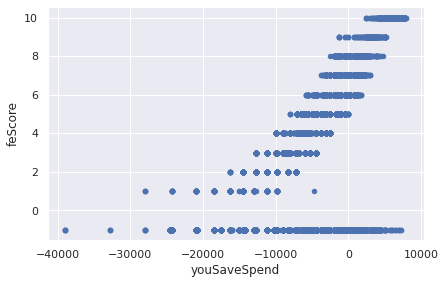

In [ ]:
data2 = pd.concat([data['feScore'], data['youSaveSpend']], axis=1)
data2.plot.scatter(x='youSaveSpend', y='feScore')

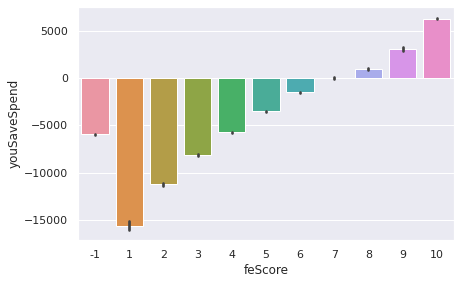

In [ ]:
sns.barplot(data.feScore, data.youSaveSpend)

кажется, что слишком много пропущенных. в описании -1. Заменим -1 на nan и проверим

In [ ]:
data['feScore'].replace(-1, np.NaN, inplace=True)

mis_percent = (100 * data['feScore'].isnull().sum() / len(data['feScore'])).round()
mis_percent

70.0

70 датасета пропущенно. Признак можно не считать.

# **Проверим коробку передач и привод** 

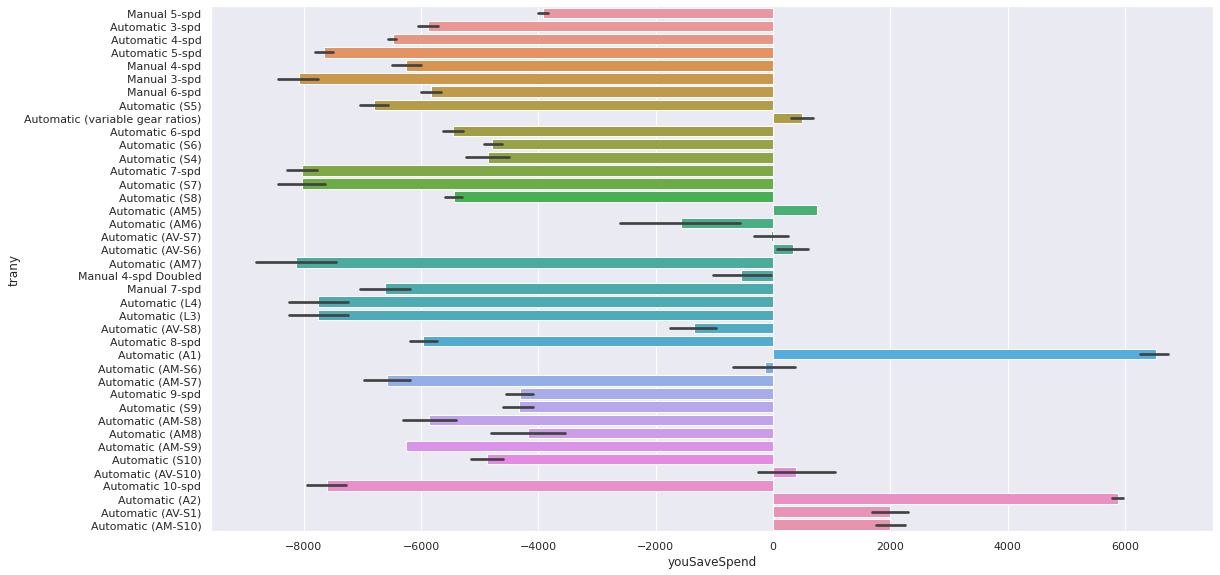

In [ ]:
sns.set()
plt.figure(figsize = (16,9))
sns.barplot(data.youSaveSpend, data.trany)

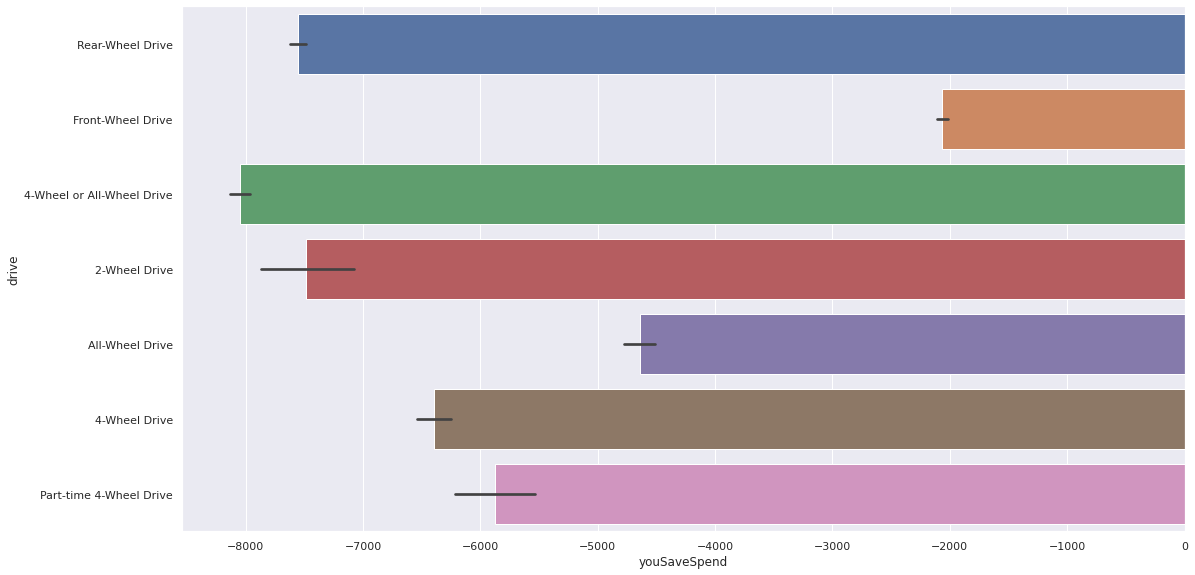

In [ ]:
sns.set()
plt.figure(figsize = (16,9))
sns.barplot(data.youSaveSpend, data.drive)

Видно, что коробка передач имеет значение и переднеприводные машины требуют меньше расхода. 

График расхода выглядит странно. Посмотрим внимательнее

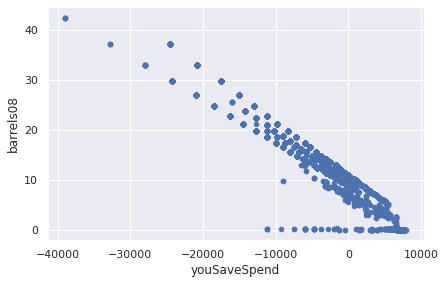

In [ ]:
data2 = pd.concat([data['barrels08'], data['youSaveSpend']], axis=1)
data2.plot.scatter(x='youSaveSpend', y='barrels08')

баррели 0 выглядит как выброс. Интересно почему? Рассмотрим детальнее

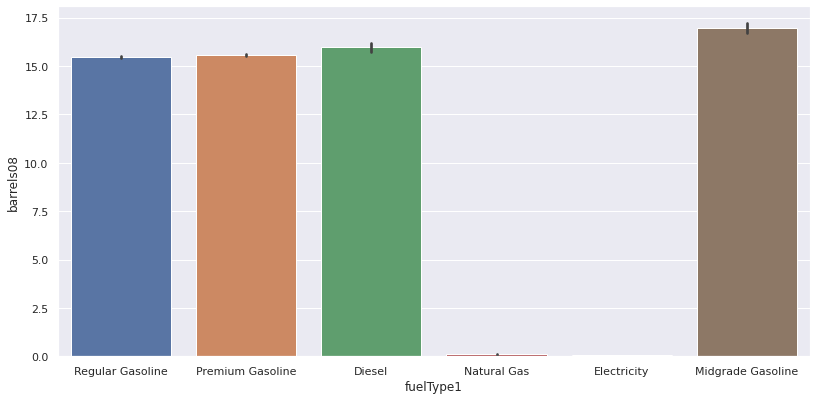

In [ ]:
sns.set()
plt.figure(figsize = (12,6))
sns.barplot(data.fuelType1, data.barrels08)

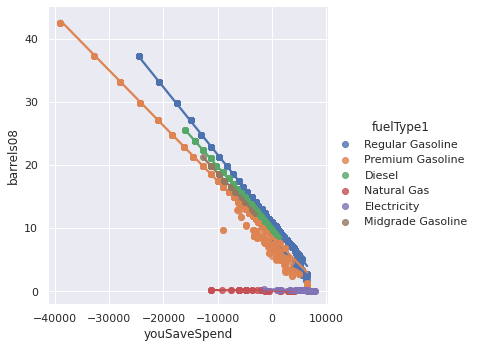

In [ ]:
sns.lmplot(x="youSaveSpend", y="barrels08", hue="fuelType1", data=data);

Электромашины потребляют мало топлива. Логично.





# **Feature Engineering and Selection**

In [ ]:
from sklearn.preprocessing import LabelEncoder




In [ ]:
# encoding categorical variable
le = LabelEncoder()
data['fuelType1'] = le.fit_transform(data['fuelType1'])
data['drive'] = le.fit_transform(data['drive'])
data['trany'] = le.fit_transform(data['trany'])

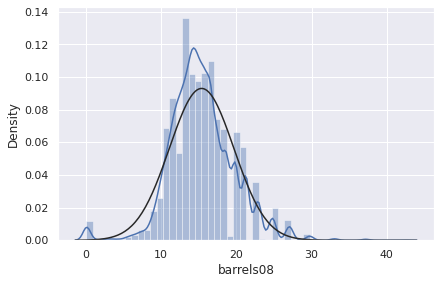

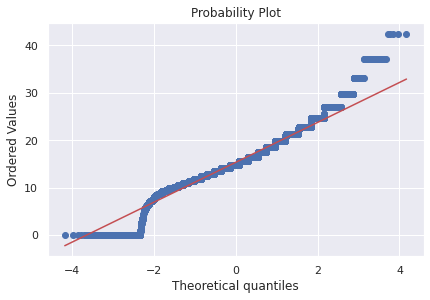

In [ ]:
#histogram and normal probability plot
sns.distplot(data['barrels08'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['barrels08'], plot=plt)

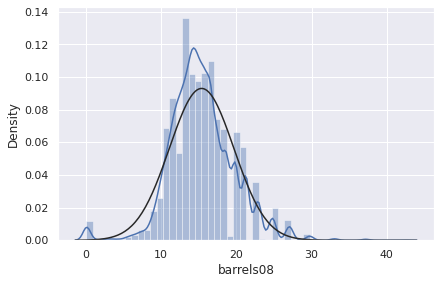

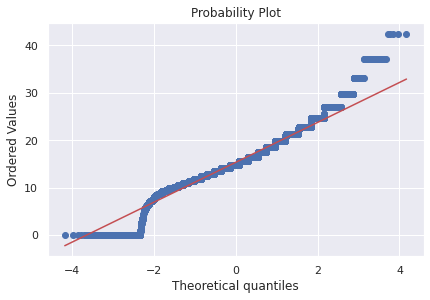

In [ ]:
sns.distplot(data[data['barrels08']>0]['barrels08'], fit=norm);
fig = plt.figure()
res = stats.probplot(data[data['barrels08']>0]['barrels08'], plot=plt)

32012